# DATA SCIENCE ASSIGNMENT

## Analysis 1: Stratification of Pancreatic tumor samples on the basis of histology

It can be observed that certain genes are highly abundant and certain genes are absent. For instance, the expression of the genes such as KIAA1712, KIAA1715, KIAA1755, KIAA197 is more prominentin the initial 50 % of the samples. The overall distribution of the genes is non-uniformly varied across the different samples. The tumors are not explicitly differentiable based on their histological origin. The classification can be carried out on the basis of pancreas-adenocarcinoma ductal subtype (which denotes exocrine tumors) and the subtypes, such as mucinous non-cystic and other are of neoendocrine nature. 

In [50]:
library(IRdisplay)

In [52]:
pca_plot_path <- ("/Users/prasath/Downloads/newplot.png")

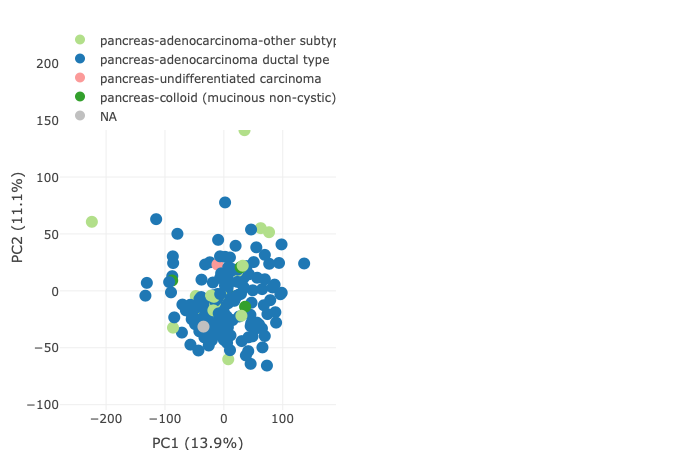

In [54]:
display_png(file = pca_plot_path)

The variance of the two subtypes are more or less similar with only a few data points of the neoendocrine tumors being the outliers.

Since there were issues encountered during the installation of the "cmapR" package, the removal of the neoendocrine tumors was carried out using the filter option of the Phantasus tool and the resultant dataset was downloaded from Phantasus for subsequent analysis.

## Analysis 2: Type 1 IFN signature in Pancreatic Adenocarcinoma Tumors

The presence of IFN signature in pancreatic adenocarcinoma can be characterized by computing Gene Set Variation Analysis (GSVA) enrichment scores by transforming the gene by sample matrix into a gene set by sample matrix. This analysis follows the approach explored in Balli, D.(2016). Using a gene by expression matrix and a gene set list, the GSVA algorithm sequentially, calculates the gene expression level statistic following which the rank order per sample is generated. For every gene set, the Kolmogorov-Smirnov-like rank statistic is calculated  and finally, the different score distributions are obtained. The scores vary based on the positive and negative presence of IFN genes in th samples.

In [1]:
library(Biobase)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To 

In [2]:
library(GSVA)

In [3]:
library(lattice)

In [4]:
library(RColorBrewer)

In [5]:
expression_path <- ("/Users/prasath/Desktop/PAAD_exocrine_edited.txt")

In [6]:
expression <- as.matrix(read.table(expression_path, header=TRUE, sep="\t",row.names=1, as.is=TRUE))

In [15]:
ifn_list <- c("IFIT1","IFI44","IFIT3","MX2","OAS1","OAS3","BST2","IFITM1","MX1","STAT1","IFI27","CXCL10","IFI16","IFI30","IFIH1","IFIT2","IFITM2","IRF1","IRF9","IRGM","ISG15","OAS2","PSME1","SOCS1","STAT2")


In [16]:
ifn_list <- as.list(ifn_list)

In [42]:
gene_scores_max <- gsva(expression, ifn_list,mx.diff=TRUE, verbose=FALSE, parallel.sz=1)

Warning message in .local(expr, gset.idx.list, ...):
“3713 genes with constant expression values throuhgout the samples.”
Warning message in .local(expr, gset.idx.list, ...):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


In [43]:
gene_scores_dif <- gsva(expression, ifn_list,mx.diff=FALSE, verbose=FALSE, parallel.sz=1)

Warning message in .local(expr, gset.idx.list, ...):
“3713 genes with constant expression values throuhgout the samples.”
Warning message in .local(expr, gset.idx.list, ...):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


In [44]:
par(mfrow=c(1,2), mar=c(4, 4, 4, 1))

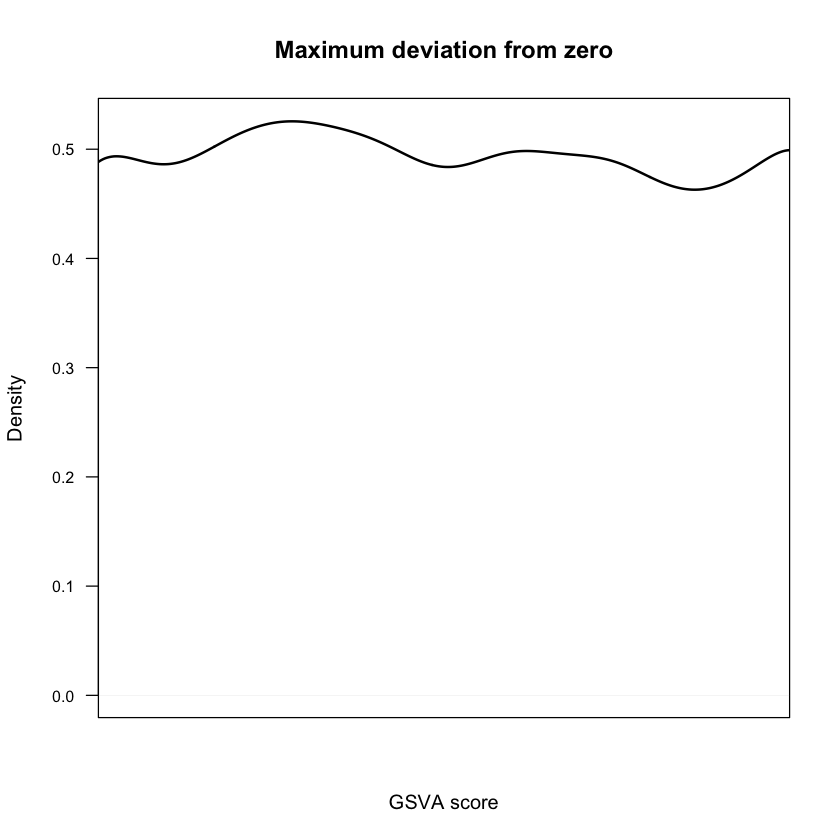

In [45]:
plot(density(as.vector(gene_scores_max)), main="Maximum deviation from zero",xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)

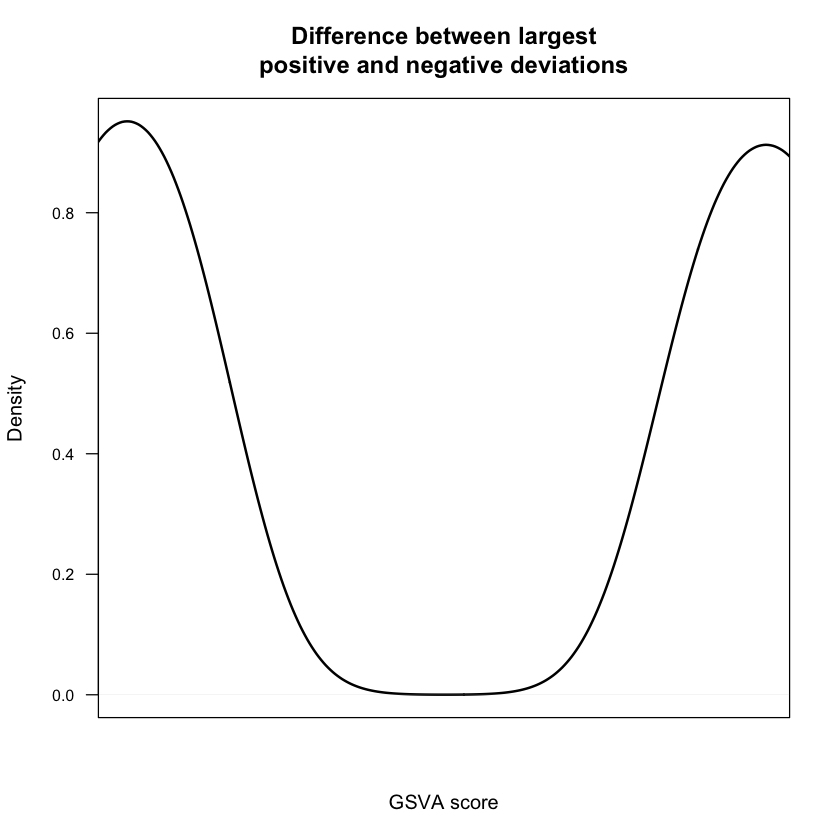

In [46]:
plot(density(as.vector(gene_scores_dif)), main="Difference between largest\npositive and negative deviations",xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)

In [18]:
pear <- cor(gene_scores, method="pearson")

In [19]:
palette <-colorRampPalette(c("yellow", "black","blueviolet"))

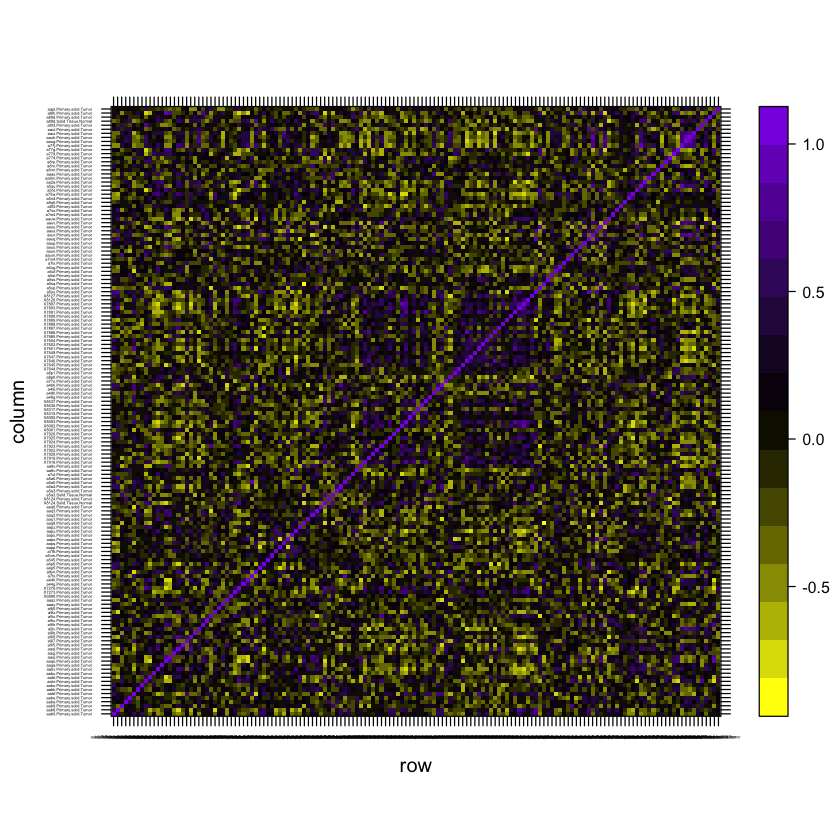

In [20]:
levelplot(pear,col.regions=palette, scales=list(cex=0.2))

In [23]:
pear.dist <- as.dist((1-pear)/2)

In [24]:
hp <- hclust(pear.dist, method="complete")

In [25]:
data.med.center <- sweep(gene_scores, MARGIN=1, STATS=apply(gene_scores,1,median), FUN = "-",) 

In [26]:
data.med.center[data.med.center > 5 ] <- 5

In [27]:
data.med.center[ data.med.center < -5 ] <- -5

In [28]:
pear.cols <- cor(t(data.med.center), method="pearson")

In [29]:
pear.dist <- as.dist((1-pear.cols)/2)

In [30]:
hc.cols <- hclust(pear.dist, method="average")

In [31]:
pear.rows <- cor(data.med.center, method="pearson")

In [32]:
pear.dist <- as.dist((1-pear.rows)/2)

In [33]:
hc.rows <- hclust(pear.dist, method="average")

In [34]:
col.fun = colorRampPalette(c("green", "black", "red"))

Warning message in plot.window(...):
“"cluster.by.col" is not a graphical parameter”
Warning message in plot.window(...):
“"cluster.by.row" is not a graphical parameter”
Warning message in plot.window(...):
“"hclust.col" is not a graphical parameter”
Warning message in plot.window(...):
“"hclust.row" is not a graphical parameter”
Warning message in plot.window(...):
“"color.FUN" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"cluster.by.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"cluster.by.row" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"hclust.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"hclust.row" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"color.FUN" is not a graphical parameter”
Warning message in title(...):
“"cluster.by.col" is not a graphical parameter”
Warning message in title(...):
“"cluster.by.row" is not a graphical

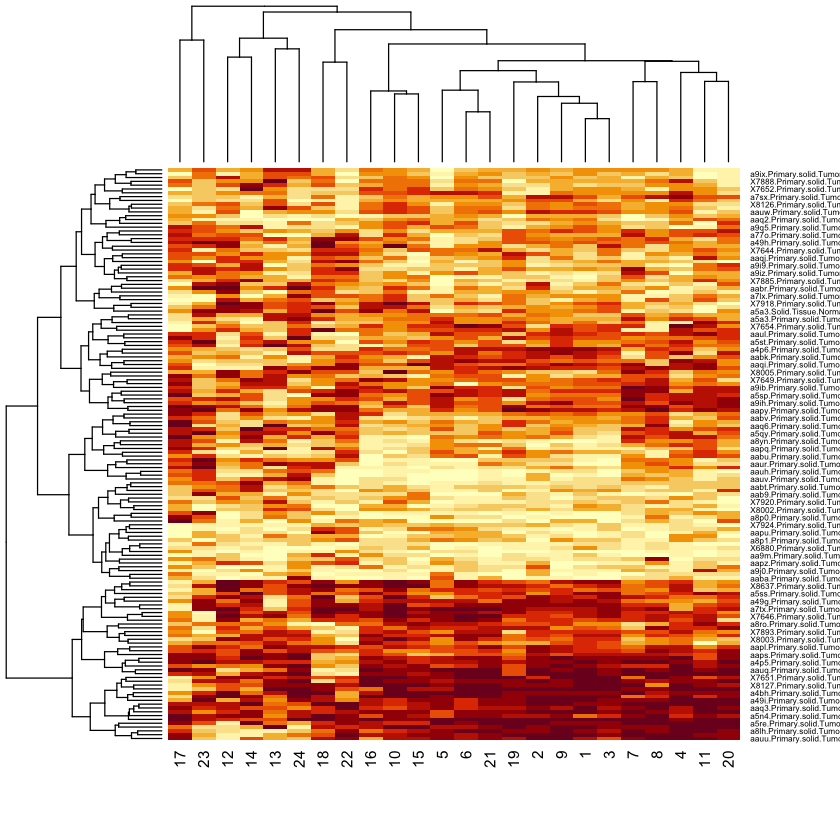

In [41]:
heatmap(t(data.med.center), scale="none",cluster.by.col=TRUE, cluster.by.row=TRUE, Rowv=TRUE,Colv=TRUE,hclust.col = hc.cols, 
hclust.row = hc.rows, labCol=NULL,cexRow = 0.5,color.FUN = col.fun)

On observing the heatmap, it can be said that several IFN genes are more abundant in certain samples than others. It can be concluded that distribution of genes in the density plot and the heatmap can help in the identification of the presence of high and low IFN subtypes in the case of Pancreatic adenocarcinoma (PAAD).

REFERENCES
Balli, D., Rech, A. J., Stanger, B. Z., & Vonderheide, R. H. (2016). Immune Cytolytic Activity Stratifies Molecular Subsets of Human Pancreatic Cancer. Clinical Cancer Research, 23(12), 3129–3138. doi:10.1158/1078-0432.ccr-16-2128 

Zenkova D., Kamenev V., Sablina R., Artyomov M., Sergushichev A. Phantasus: visual and interactive gene expression analysis. https://genome.ifmo.ru/phantasus doi: 10.18129/B9.bioc.phantasus